In [1]:
import pyspark.sql
import pandas as pd

In [2]:
# Create output directory
output_dir = "Data_Metrics_Output"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

snapshot = "2021-01"

### Total number of records (per wiki)

In [3]:
query = """SELECT wiki AS Wiki, snapshot, COUNT(*) as `Number of Records`
        FROM gmodena.imagerec_prod
        WHERE snapshot='"""+snapshot+"""' 
        GROUP BY wiki, snapshot
        ORDER BY wiki"""
total_number_of_records = spark.sql(query).toPandas()

In [4]:
total_number_of_records

,Wiki,snapshot,Number of Records
0,arwiki,2021-01,145417
1,arzwiki,2021-01,164723
2,bnwiki,2021-01,19241
3,cebwiki,2021-01,190968
4,cswiki,2021-01,90740
5,dewiki,2021-01,33203
6,enwiki,2021-01,391438
7,euwiki,2021-01,53053
8,fawiki,2021-01,177652
9,frwiki,2021-01,205118


In [5]:
total_number_of_records.to_csv(output_dir+"/"+"Total number of records")

### Population statistics

In [6]:
population_stat = total_number_of_records['Number of Records'].describe()
population_stat.to_csv(output_dir+"/"+"Population statistics")
population_stat

count        19.000000
mean     126307.263158
std       93543.664716
min       19241.000000
25%       46432.500000
50%      117604.000000
75%      184310.000000
max      391438.000000
Name: Number of Records, dtype: float64

In [7]:
pop_stat_median = pd.DataFrame(data={"Median": [total_number_of_records["Number of Records"].median()]})
pop_stat_median.to_csv(output_dir+"/"+"Population statistics median")
pop_stat_median

,Median
0,117604.0


In [8]:
pop_stat_mode = total_number_of_records['Number of Records'].mode()
pop_stat_mode.to_csv(output_dir+"/"+"Population statistics mode")
pop_stat_mode

0      19241
1      33203
2      35977
3      38461
4      39812
5      53053
6      64140
7      70262
8      90740
9     117604
10    135953
11    145417
12    164723
13    177652
14    190968
15    205118
16    211624
17    214452
18    391438
dtype: int64

### Total number of images per page

In [9]:
query = """SELECT wiki AS Wiki, page_id as `Page ID`, COUNT(*) as `Number of Images`
        FROM gmodena.imagerec_prod
        WHERE snapshot='"""+snapshot+"""'
        GROUP BY wiki, page_id
        ORDER BY wiki, page_id"""
total_number_of_images_per_page = spark.sql(query).toPandas()

In [10]:
total_number_of_images_per_page.to_csv(output_dir+"/"+"Total number of images per page")
total_number_of_images_per_page

,Wiki,Page ID,Number of Images
0,arwiki,1000005,3
1,arwiki,1000145,1
2,arwiki,1000169,1
3,arwiki,1000376,3
4,arwiki,1000409,1
5,arwiki,1000432,3
6,arwiki,1000466,1
7,arwiki,1000485,1
8,arwiki,1000792,3
9,arwiki,1000875,1


#### Breakdown of the number of images being suggested for each page

Keep in mind that pages without an image suggestion will apear as 1.

In [11]:
query = """SELECT number_of_images AS `Image Suggestions`, count(*) AS `Pages`
        FROM (
        SELECT wiki, page_id, COUNT(*) as number_of_images
        FROM gmodena.imagerec_prod
        WHERE snapshot='"""+snapshot+"""'
        GROUP BY wiki, page_id
        ) AS expr_qry 
        GROUP BY number_of_images
        ORDER BY number_of_images"""
breakdown_of_image_sug_per_page = spark.sql(query).toPandas()

In [12]:
breakdown_of_image_sug_per_page.set_index('Image Suggestions', inplace=True)
breakdown_of_image_sug_per_page.to_csv(output_dir+"/"+"Breakdown of image sug per page")
breakdown_of_image_sug_per_page

,Pages
Image Suggestions,
1,1085043
2,172419
3,323310
4,1
5,1
6,3


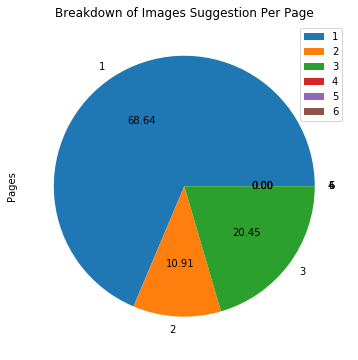

In [14]:
breakdown_of_image_sug_per_page.plot(y="Pages",
                                     title="Breakdown of Images Suggestion Per Page",
                                     autopct="%.2f",
                                     figsize=(6, 6),
                                     kind="pie");

Breakdown of image suggestion data by confidence rating.
A rating of None indicates that the page has no image suggestion

In [15]:
query = """SELECT wiki AS Wiki, confidence_rating AS `Confidence Rating`, COUNT(*) AS `Image Suggestions`
        FROM gmodena.imagerec_prod
        WHERE snapshot='"""+snapshot+"""'
        GROUP BY Wiki, `Confidence Rating`
        ORDER BY Wiki, `Confidence Rating`"""
breakdown_of_image_sug_by_confidence_score = spark.sql(query).toPandas()

In [16]:
breakdown_of_image_sug_by_confidence_score.to_csv(output_dir+"/"+"Breakdown of image sug by conf rating")
breakdown_of_image_sug_by_confidence_score

,Wiki,Confidence Rating,Image Suggestions
0,arwiki,None,39674
1,arwiki,high,6430
2,arwiki,low,19328
3,arwiki,medium,79985
4,arzwiki,None,114306
5,arzwiki,high,617
6,arzwiki,low,14263
7,arzwiki,medium,35537
8,bnwiki,None,3652
9,bnwiki,high,2185


#### Get articles with more than 3 image suggestions

Assuming no error this table should be empty

In [17]:
query = """WITH large_image_sug AS 
        (SELECT wiki, page_id, COUNT(*)
        FROM gmodena.imagerec_prod
        WHERE snapshot='"""+snapshot+"""'
        GROUP BY wiki, page_id
        HAVING COUNT(*) > 3)
        SELECT p.* 
        FROM gmodena.imagerec_prod p
        JOIN large_image_sug
        ON large_image_sug.wiki = p.wiki
        AND large_image_sug.page_id = p.page_id
        AND p.snapshot='"""+snapshot+"""'
        ORDER BY p.wiki, p.page_id, p.image_id"""
articles_with_more_image_sug = spark.sql(query).toPandas()

In [18]:
articles_with_more_image_sug.to_csv(output_dir+"/"+"Articles with more than 3 sug")
articles_with_more_image_sug

,page_id,page_title,image_id,confidence_rating,source,dataset_id,insertion_ts,wiki,snapshot
0,63771264,Nucleocytoviricota,Comparison_of_the_size_of_giant_viruses_to_a_c...,medium,wikipedia,<function uuid4 at 0x7f1366cc9d90>,1.614798e+09,enwiki,2021-01
1,63771264,Nucleocytoviricota,Comparison_of_the_size_of_giant_viruses_to_a_c...,medium,wikipedia,<function uuid4 at 0x7f1366cc9d90>,1.614798e+09,enwiki,2021-01
2,63771264,Nucleocytoviricota,Electron_microscopic_image_of_a_mimivirus_-_jo...,medium,wikipedia,<function uuid4 at 0x7f1366cc9d90>,1.614798e+09,enwiki,2021-01
3,63771264,Nucleocytoviricota,Electron_microscopic_image_of_a_mimivirus_-_jo...,medium,wikipedia,<function uuid4 at 0x7f1366cc9d90>,1.614798e+09,enwiki,2021-01
4,63771264,Nucleocytoviricota,Megavirus.jpg,high,wikidata,<function uuid4 at 0x7f1366cc9d90>,1.614798e+09,enwiki,2021-01
5,63771264,Nucleocytoviricota,Megavirus.jpg,medium,wikipedia,<function uuid4 at 0x7f1366cc9d90>,1.614798e+09,enwiki,2021-01
6,225672,Metanogenesi,Anaerobic_food_chain.svg,low,commons,<function uuid4 at 0x7f1366cc9d90>,1.614798e+09,euwiki,2021-01
7,225672,Metanogenesi,Cofactor_F430.png,low,commons,<function uuid4 at 0x7f1366cc9d90>,1.614798e+09,euwiki,2021-01
8,225672,Metanogenesi,Cofactor_F430.png,low,commons,<function uuid4 at 0x7f1366cc9d90>,1.614798e+09,euwiki,2021-01
9,225672,Metanogenesi,F420.png,low,commons,<function uuid4 at 0x7f1366cc9d90>,1.614798e+09,euwiki,2021-01


### Size and counts of intermediate and final datasets

In [19]:
query = """SELECT wiki_db AS `Wiki`, snapshot, COUNT(*) AS `Raw Number of Records`
        FROM gmodena.imagerec
        WHERE snapshot='"""+snapshot+"""'
        GROUP BY wiki_db, snapshot
        ORDER BY wiki_db"""
raw_total_number_of_records = spark.sql(query).toPandas()

In [20]:
raw_total_number_of_records

,Wiki,snapshot,Raw Number of Records
0,arwiki,2021-01,100414
1,arzwiki,2021-01,149542
2,bnwiki,2021-01,10685
3,cebwiki,2021-01,117257
4,cswiki,2021-01,55183
5,dewiki,2021-01,22011
6,enwiki,2021-01,299996
7,euwiki,2021-01,34708
8,fawiki,2021-01,118847
9,frwiki,2021-01,147378


In [21]:
total_number_of_records = total_number_of_records.rename(columns={"Number of Records": "Final Number of Records"})
result = pd.merge(raw_total_number_of_records, total_number_of_records, on=["Wiki", "snapshot"])

In [22]:
result.to_csv(output_dir+"/"+"Counts of intermediate and final datasets")
result

,Wiki,snapshot,Raw Number of Records,Final Number of Records
0,arwiki,2021-01,100414,145417
1,arzwiki,2021-01,149542,164723
2,bnwiki,2021-01,10685,19241
3,cebwiki,2021-01,117257,190968
4,cswiki,2021-01,55183,90740
5,dewiki,2021-01,22011,33203
6,enwiki,2021-01,299996,391438
7,euwiki,2021-01,34708,53053
8,fawiki,2021-01,118847,177652
9,frwiki,2021-01,147378,205118


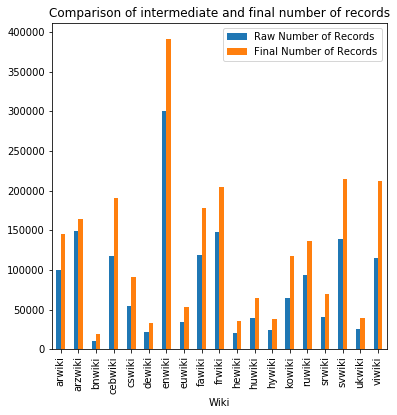

In [23]:
result.plot(x="Wiki",
            y=["Raw Number of Records", "Final Number of Records"],
            title="Comparison of intermediate and final number of records",
            figsize=(6, 6),
            kind="bar")